## Aim :- Implement State Action Reward  State action (SARSA) algorithm using python and compare it with Q Learning


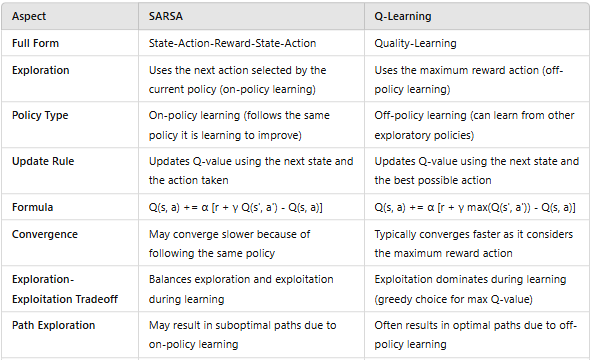

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# Define the environment
def create_gridworld():
    return np.zeros((4, 4)), (3, 3)  # Grid and goal state

def is_terminal_state(state, goal_state):
    return state == goal_state

def get_next_state(state, action):
    moves = {
        "up": (-1, 0),
        "down": (1, 0),
        "left": (0, -1),
        "right": (0, 1),
    }
    next_state = (state[0] + moves[action][0], state[1] + moves[action][1])
    if 0 <= next_state[0] < 4 and 0 <= next_state[1] < 4:
        return next_state
    return state  # Return current state if action goes out of bounds

def get_possible_actions():
    return ["up", "down", "left", "right"]

def get_reward(state, goal_state):
    return 1 if state == goal_state else -1

### SARSA algorithm

In [ ]:
def sarsa(grid, goal_state, episodes, alpha, gamma, epsilon):
    q_table = np.zeros((4, 4, 4))  # Q-table
    actions = get_possible_actions()
    action_map = {a: i for i, a in enumerate(actions)}

    for episode in range(episodes):
        state = (0, 0)
        action = np.random.choice(actions) if np.random.rand() < epsilon else actions[np.argmax(q_table[state[0], state[1]])]

        while not is_terminal_state(state, goal_state):
            next_state = get_next_state(state, action)
            next_action = np.random.choice(actions) if np.random.rand() < epsilon else actions[np.argmax(q_table[next_state[0], next_state[1]])]

            reward = get_reward(next_state, goal_state)
            q_table[state[0], state[1], action_map[action]] += alpha * (
                reward + gamma * q_table[next_state[0], next_state[1], action_map[next_action]] - q_table[state[0], state[1], action_map[action]]
            )

            state = next_state
            action = next_action

    return q_table

### Q-Learning algorithm

In [ ]:
def q_learning(grid, goal_state, episodes, alpha, gamma, epsilon):
    q_table = np.zeros((4, 4, 4))  # Q-table
    actions = get_possible_actions()
    action_map = {a: i for i, a in enumerate(actions)}

    for episode in range(episodes):
        state = (0, 0)

        while not is_terminal_state(state, goal_state):
            action = np.random.choice(actions) if np.random.rand() < epsilon else actions[np.argmax(q_table[state[0], state[1]])]

            next_state = get_next_state(state, action)
            reward = get_reward(next_state, goal_state)

            q_table[state[0], state[1], action_map[action]] += alpha * (
                reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action_map[action]]
            )

            state = next_state

    return q_table

### Visualization

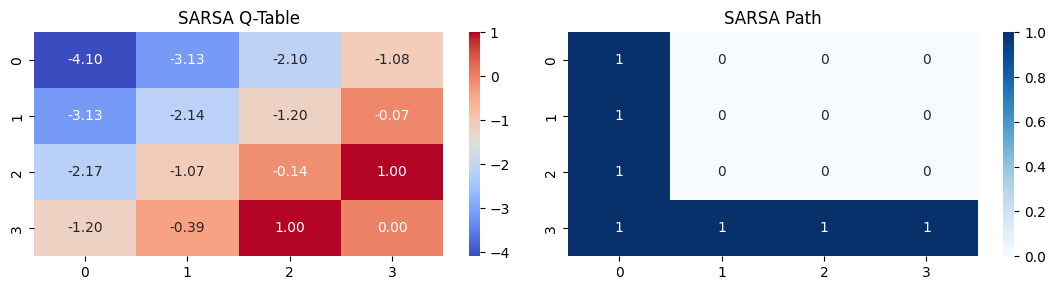

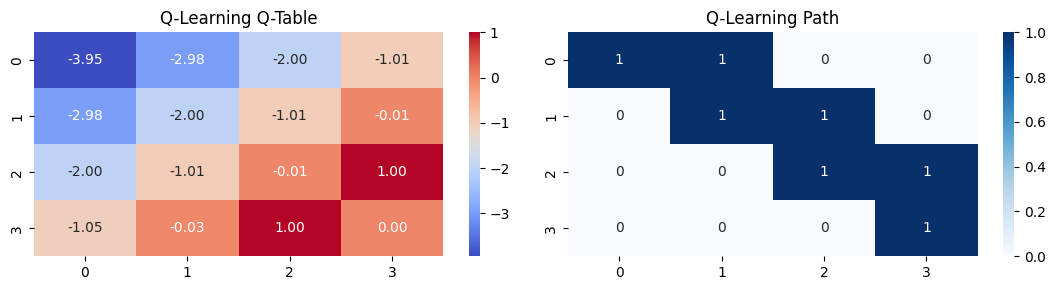

In [ ]:
def visualize_q_table_and_path(q_table, goal_state, title):
    fig, axes = plt.subplots(1, 2, figsize=(11, 3))

    # Q-table visualization
    sns.heatmap(np.max(q_table, axis=2), annot=True, fmt=".2f", cmap="coolwarm", ax=axes[0])
    axes[0].set_title(f"{title} Q-Table")

    # Path visualization
    state = (0, 0)
    path = [state]
    actions = get_possible_actions()
    action_map = {a: i for i, a in enumerate(actions)}

    while not is_terminal_state(state, goal_state):
        action_index = np.argmax(q_table[state[0], state[1]])
        action = actions[action_index]
        state = get_next_state(state, action)
        path.append(state)

    grid = np.zeros((4, 4))
    for step in path:
        grid[step[0], step[1]] += 1

    sns.heatmap(grid, annot=True, fmt=".0f", cmap="Blues", ax=axes[1])
    axes[1].set_title(f"{title} Path")

    plt.tight_layout()
    plt.show()

# Main
grid, goal_state = create_gridworld()
episodes = 500
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Train SARSA
sarsa_q_table = sarsa(grid, goal_state, episodes, alpha, gamma, epsilon)

# Train Q-Learning
qlearning_q_table = q_learning(grid, goal_state, episodes, alpha, gamma, epsilon)

# Visualize results
visualize_q_table_and_path(sarsa_q_table, goal_state, "SARSA")
visualize_q_table_and_path(qlearning_q_table, goal_state, "Q-Learning")
